In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Football-Scenarios-DFE-832307.csv')

In [40]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,option1,option2,option3,option4,option5
0,831005673,False,finalized,5,11/20/15 20:20,kick a field goal,0.8092,It is first down and 10. The ball is on your o...,NaN,punt,kick a field goal,run,pass,kneel down
1,831005674,False,finalized,5,11/18/15 21:59,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
2,831005675,False,finalized,5,11/20/15 22:43,kick a field goal,0.6211,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
3,831005676,False,finalized,5,11/19/15 7:41,kick a field goal,0.8073,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
4,831005677,False,finalized,5,11/21/15 8:01,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down


In [41]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'antecedent', 'antecedent:confidence',
       'orig_antecedent', 'antecedent_gold', 'option1', 'option2', 'option3',
       'option4', 'option5'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730 entries, 0 to 3729
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               3730 non-null   int64  
 1   _golden                3730 non-null   bool   
 2   _unit_state            3730 non-null   object 
 3   _trusted_judgments     3730 non-null   int64  
 4   _last_judgment_at      3706 non-null   object 
 5   antecedent             3730 non-null   object 
 6   antecedent:confidence  3730 non-null   float64
 7   orig_antecedent        3730 non-null   object 
 8   antecedent_gold        24 non-null     object 
 9   option1                3730 non-null   object 
 10  option2                3730 non-null   object 
 11  option3                3730 non-null   object 
 12  option4                3730 non-null   object 
 13  option5                3730 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usag

In [43]:
df.isnull().sum()

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at          24
antecedent                  0
antecedent:confidence       0
orig_antecedent             0
antecedent_gold          3706
option1                     0
option2                     0
option3                     0
option4                     0
option5                     0
dtype: int64

<Axes: xlabel='count', ylabel='antecedent'>

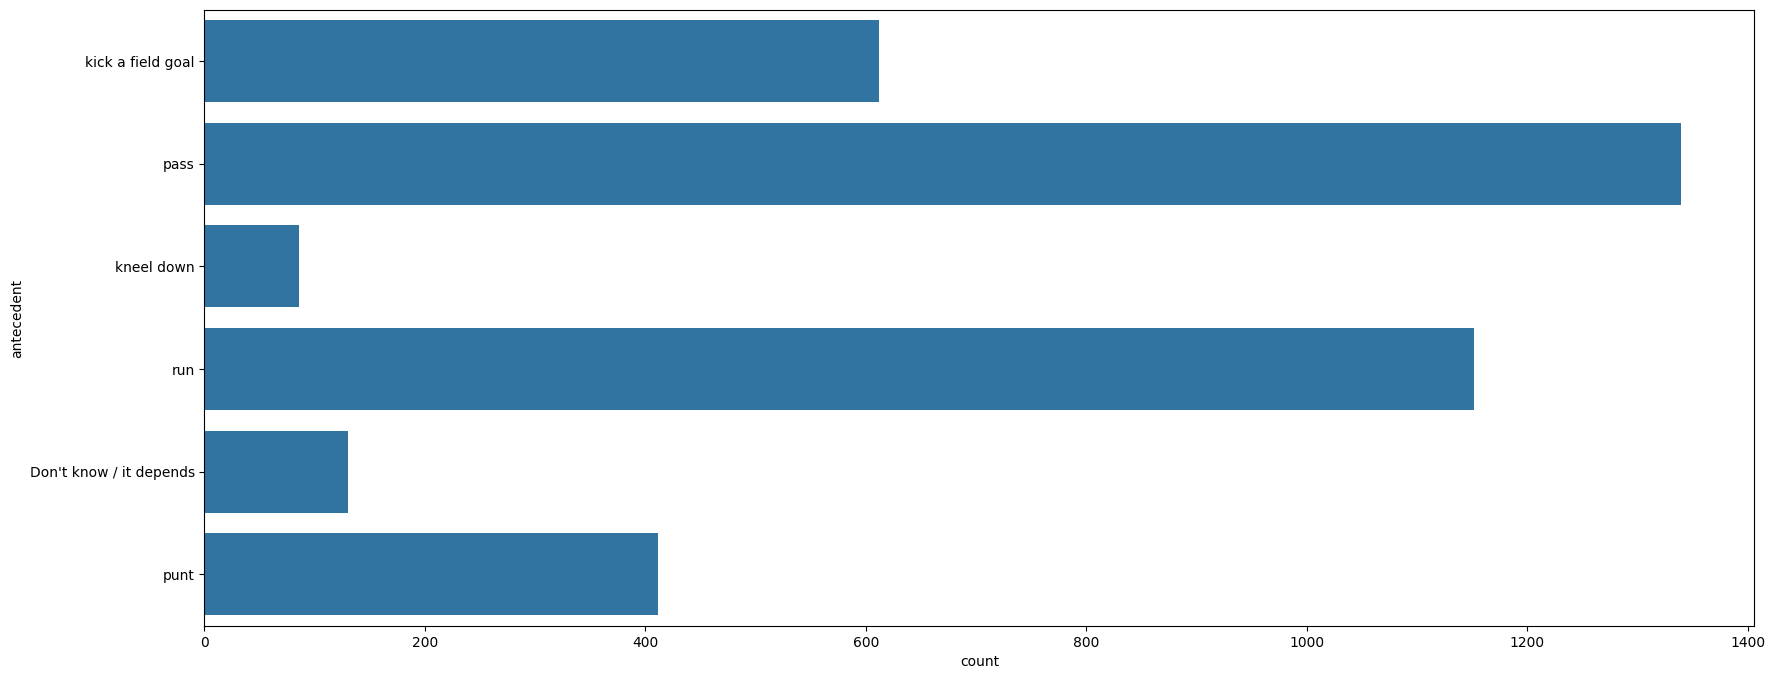

In [71]:
plt.figure(figsize=(20,8))
sns.countplot(df['antecedent'])

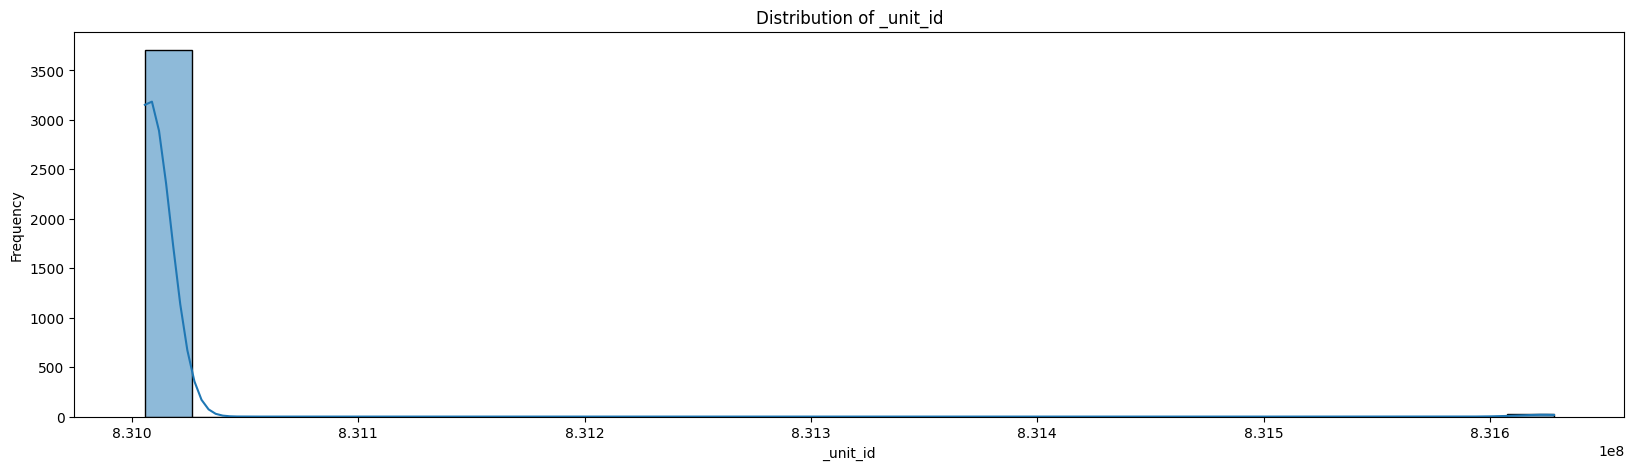

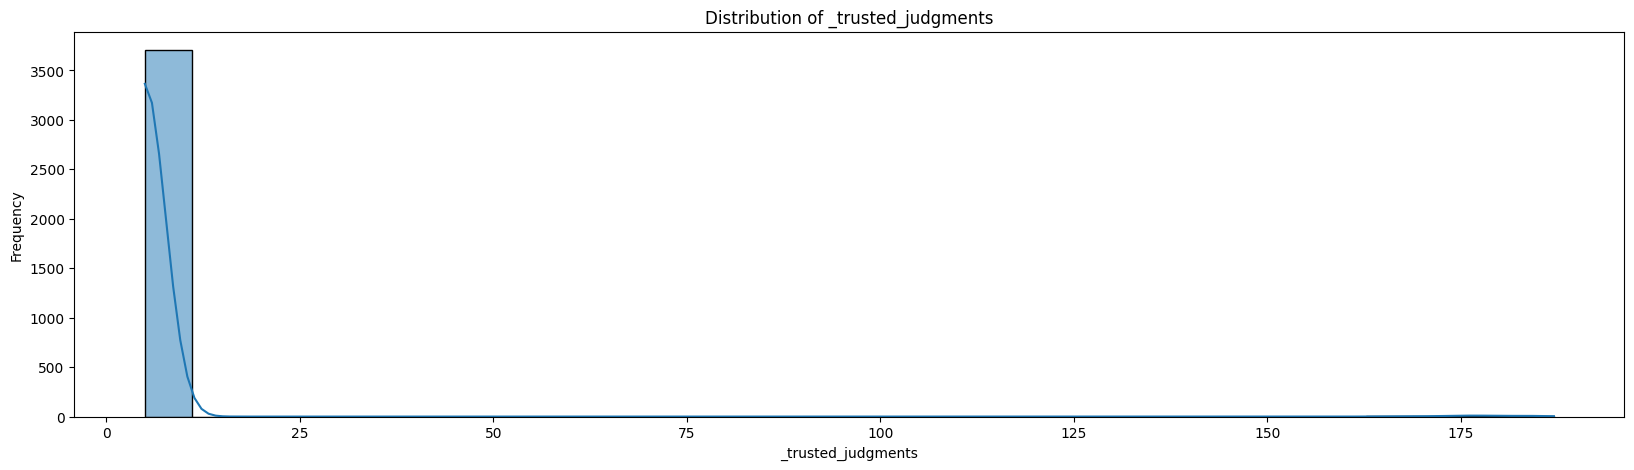

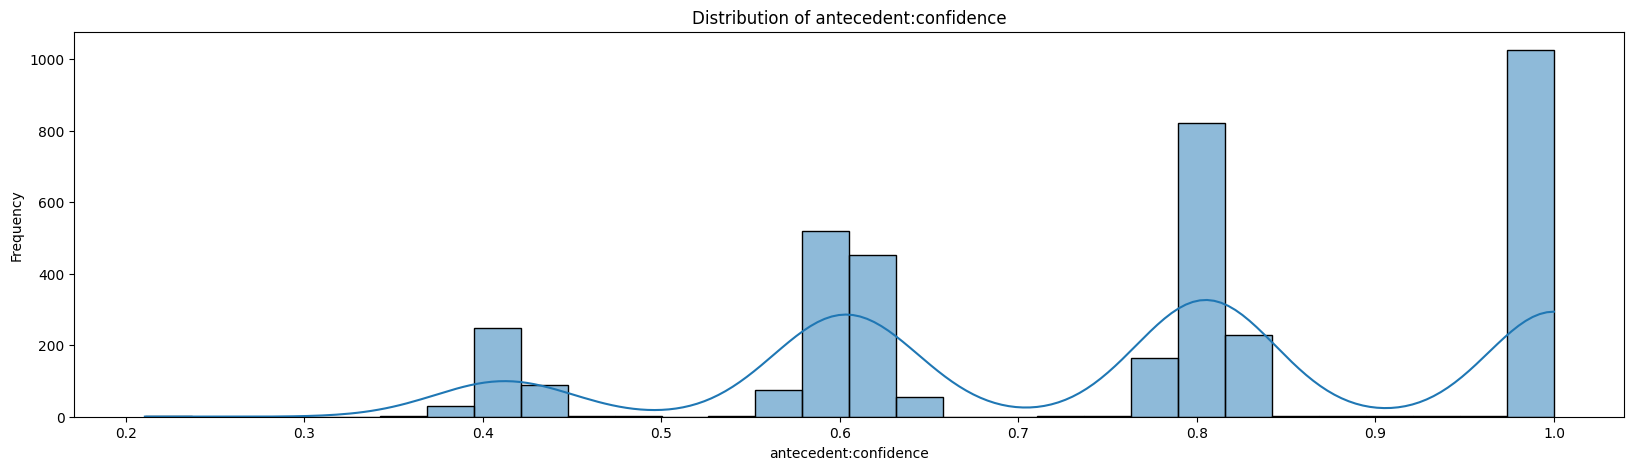

In [73]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(20,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

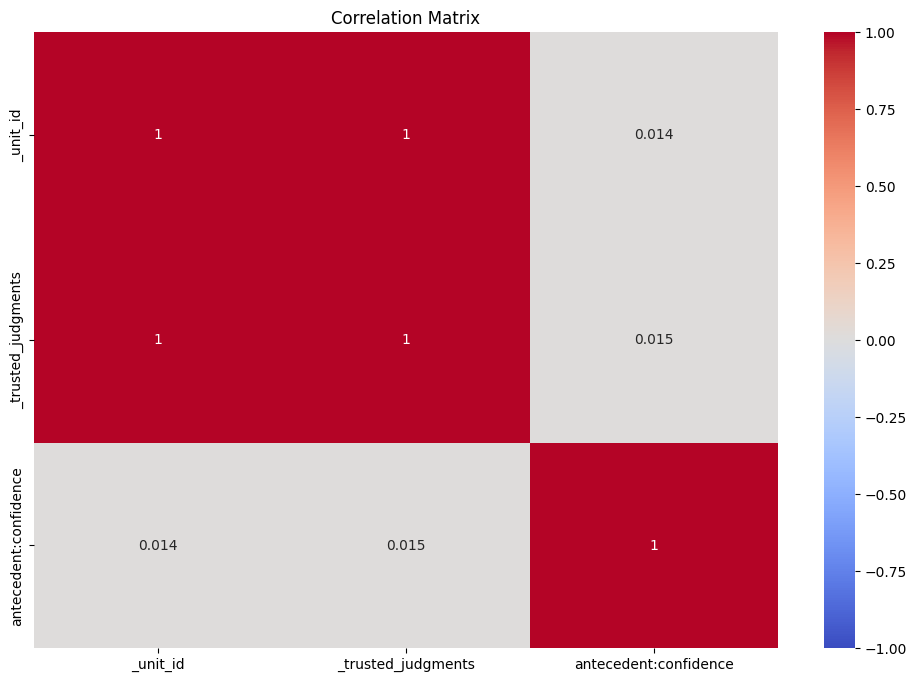

In [74]:
plt.figure(figsize=(12, 8))# Correlation matrix for numeric features
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

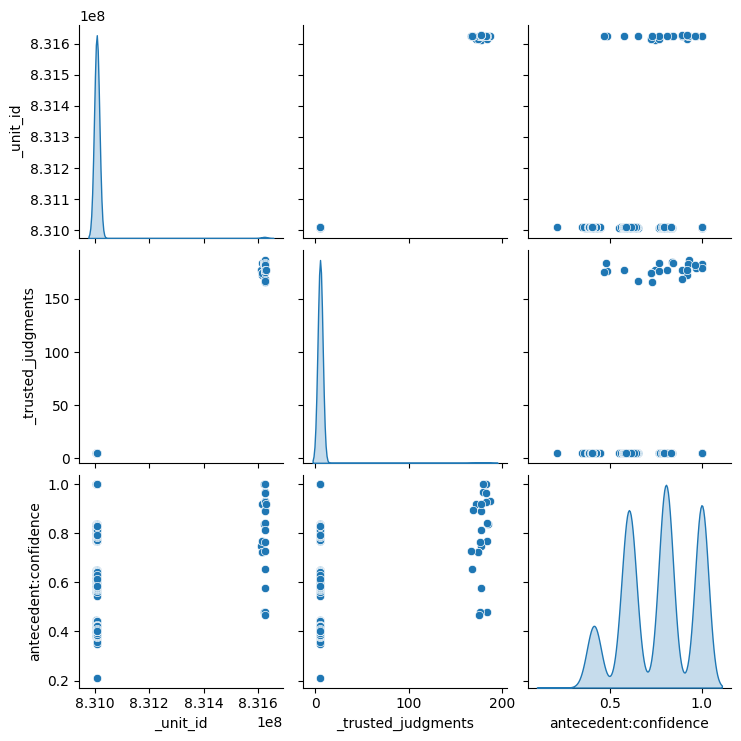

In [76]:
# Pairplot for selected numerical features
selected_numeric_cols = numeric_cols[:4]  # Select first 4 numerical columns for example

sns.pairplot(df[selected_numeric_cols], diag_kind='kde')
plt.show()

In [77]:
# Select the option columns
option_columns = ['option1', 'option2', 'option3', 'option4', 'option5']

# Melt the dataframe to stack options into a single 'options' column
df_melted = df.melt(id_vars=[col for col in df.columns if col not in option_columns],
                    value_vars=option_columns,
                    var_name='option_type',
                    value_name='options')

# Drop the 'option_type' column (since we only need the values in 'options')
df_melted = df_melted.drop(columns=['option_type'])

# Check the transformed dataframe
df_melted.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,options
0,831005673,False,finalized,5,11/20/15 20:20,kick a field goal,0.8092,It is first down and 10. The ball is on your o...,NaN,punt
1,831005674,False,finalized,5,11/18/15 21:59,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt
2,831005675,False,finalized,5,11/20/15 22:43,kick a field goal,0.6211,It is second down and inches. The ball is on y...,NaN,punt
3,831005676,False,finalized,5,11/19/15 7:41,kick a field goal,0.8073,It is second down and inches. The ball is on y...,NaN,punt
4,831005677,False,finalized,5,11/21/15 8:01,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt


In [45]:
df_melted['_golden'].value_counts()

_golden
False    18530
True       120
Name: count, dtype: int64

In [46]:
df_melted['antecedent_gold'] = df_melted['antecedent_gold'].fillna(df_melted['antecedent_gold'].mode()[0])

In [47]:
df_melted.drop('_last_judgment_at',axis=1,inplace=True)

In [49]:
df_melted['antecedent_gold'].value_counts()

antecedent_gold
run\n pass\nDon't know / it depends    18585
kick a field goal                         30
pass                                      15
punt                                      10
kneel down                                 5
run                                        5
Name: count, dtype: int64

In [50]:
df_melted['orig_antecedent'].value_counts()

orig_antecedent
 You are down by 10 points. Would you:                                                                                                                    65
 You are up by 7 points. Would you:                                                                                                                       65
 You are up by 3 points. Would you:                                                                                                                       65
 You are down by 20 points. Would you:                                                                                                                    65
 You are down by 3 points. Would you:                                                                                                                     65
                                                                                                                                                          ..
It is second down and 10. The ball is on y

In [51]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               18650 non-null  int64  
 1   _golden                18650 non-null  bool   
 2   _unit_state            18650 non-null  object 
 3   _trusted_judgments     18650 non-null  int64  
 4   antecedent             18650 non-null  object 
 5   antecedent:confidence  18650 non-null  float64
 6   orig_antecedent        18650 non-null  object 
 7   antecedent_gold        18650 non-null  object 
 8   options                18650 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [52]:
df_melted.shape

(18650, 9)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

In [55]:
# Apply label encoding to each column
df_melted['options'] = le.fit_transform(df_melted['options'])
#df['option2'] = le.fit_transform(df['option2'])
#df['option3'] = le.fit_transform(df['option3'])
#df['option4'] = le.fit_transform(df['option4'])
#df['option5'] = le.fit_transform(df['option5'])
df_melted['orig_antecedent'] = le.fit_transform(df_melted['orig_antecedent'])
df_melted['_golden'] = le.fit_transform(df_melted['_golden'])
df_melted['antecedent'] = le.fit_transform(df_melted['antecedent'])
df_melted['_unit_state'] = le.fit_transform(df_melted['_unit_state'])
df_melted['antecedent_gold'] = le.fit_transform(df_melted['antecedent_gold'])

df_melted.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,options
0,831005673,0,0,5,1,0.8092,145,5,3
1,831005674,0,0,5,1,1.0000,2447,5,3
2,831005675,0,0,5,1,0.6211,2339,5,3
3,831005676,0,0,5,1,0.8073,2443,5,3
4,831005677,0,0,5,1,1.0000,2335,5,3


In [56]:
df_melted.describe()

,_unit_id,_golden,_unit_state,_trusted_judgments,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,options
count,1.865000e+04,18650.000000,18650.000000,18650.000000,18650.000000,18650.000000,18650.000000,18650.000000,18650.000000
mean,8.310115e+08,0.006434,0.006434,6.110992,3.272118,0.759839,1780.787399,4.987131,2.000000
std,4.917848e+04,0.079958,0.079958,13.813233,1.504885,0.190088,1069.269356,0.232363,1.414251
min,8.310057e+08,0.000000,0.000000,5.000000,0.000000,0.210700,0.000000,0.000000,0.000000
25%,8.310066e+08,0.000000,0.000000,5.000000,3.000000,0.603600,853.000000,5.000000,1.000000
50%,8.310075e+08,0.000000,0.000000,5.000000,3.000000,0.798700,1778.500000,5.000000,2.000000
75%,8.310085e+08,0.000000,0.000000,5.000000,5.000000,1.000000,2707.000000,5.000000,3.000000
max,8.316283e+08,1.000000,1.000000,187.000000,5.000000,1.000000,3633.000000,5.000000,4.000000


In [57]:
df_melted.drop(['_unit_id'],axis=1,inplace=True)

[]

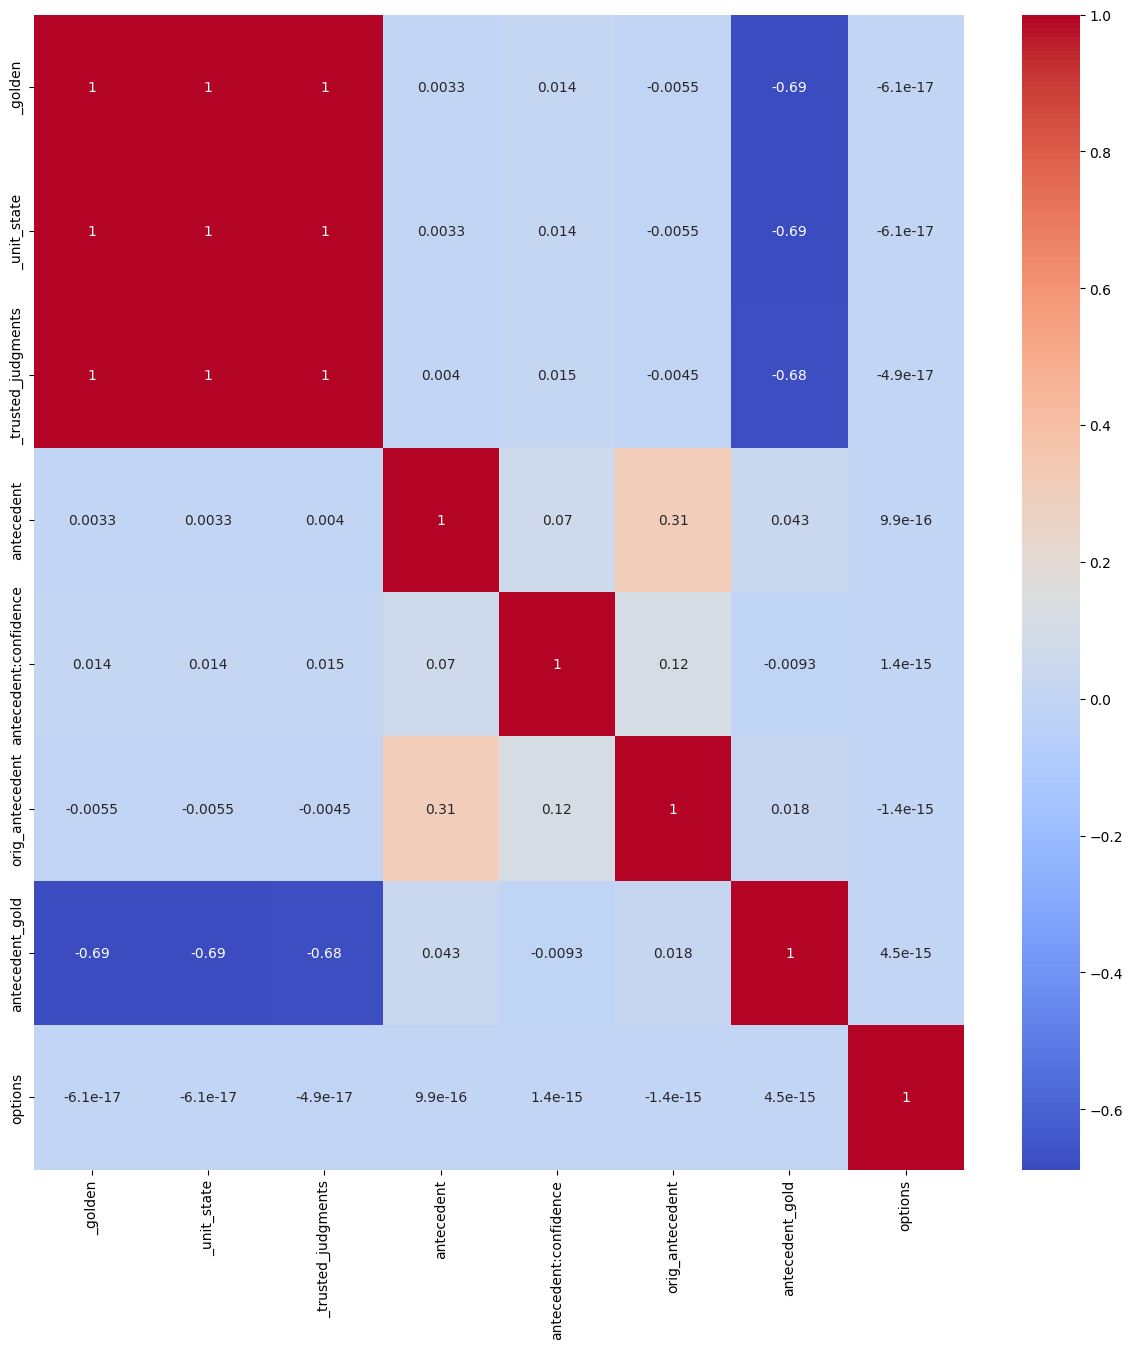

In [58]:
correlation_matrix = df_melted.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.plot()

In [59]:
df_melted.columns

Index(['_golden', '_unit_state', '_trusted_judgments', 'antecedent',
       'antecedent:confidence', 'orig_antecedent', 'antecedent_gold',
       'options'],
      dtype='object')

In [60]:
X = df_melted.drop(['antecedent_gold'],axis=1)
y = df_melted['antecedent_gold']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(max_depth=5)# postpruning
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.2222222222222222, 0.9166666666666666, 'x[2] <= 85.5\ngini = 0.007\nsamples = 14920\nvalue = [27, 5, 9, 8, 5, 14866]'),
 Text(0.1111111111111111, 0.75, 'gini = 0.0\nsamples = 14820\nvalue = [0, 0, 0, 0, 0, 14820]'),
 Text(0.16666666666666666, 0.8333333333333333, 'True  '),
 Text(0.3333333333333333, 0.75, 'x[3] <= 1.5\ngini = 0.696\nsamples = 100\nvalue = [27, 5, 9, 8, 5, 46]'),
 Text(0.2777777777777778, 0.8333333333333333, '  False'),
 Text(0.2222222222222222, 0.5833333333333334, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0, 0, 0]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[2] <= 173.0\ngini = 0.616\nsamples = 78\nvalue = [5, 5, 9, 8, 5, 46]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 3.5\ngini = 0.459\nsamples = 14\nvalue = [0, 0, 9, 5, 0, 0]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0, 0, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0]'),
 Text(0.6666666666666666, 0.4166666

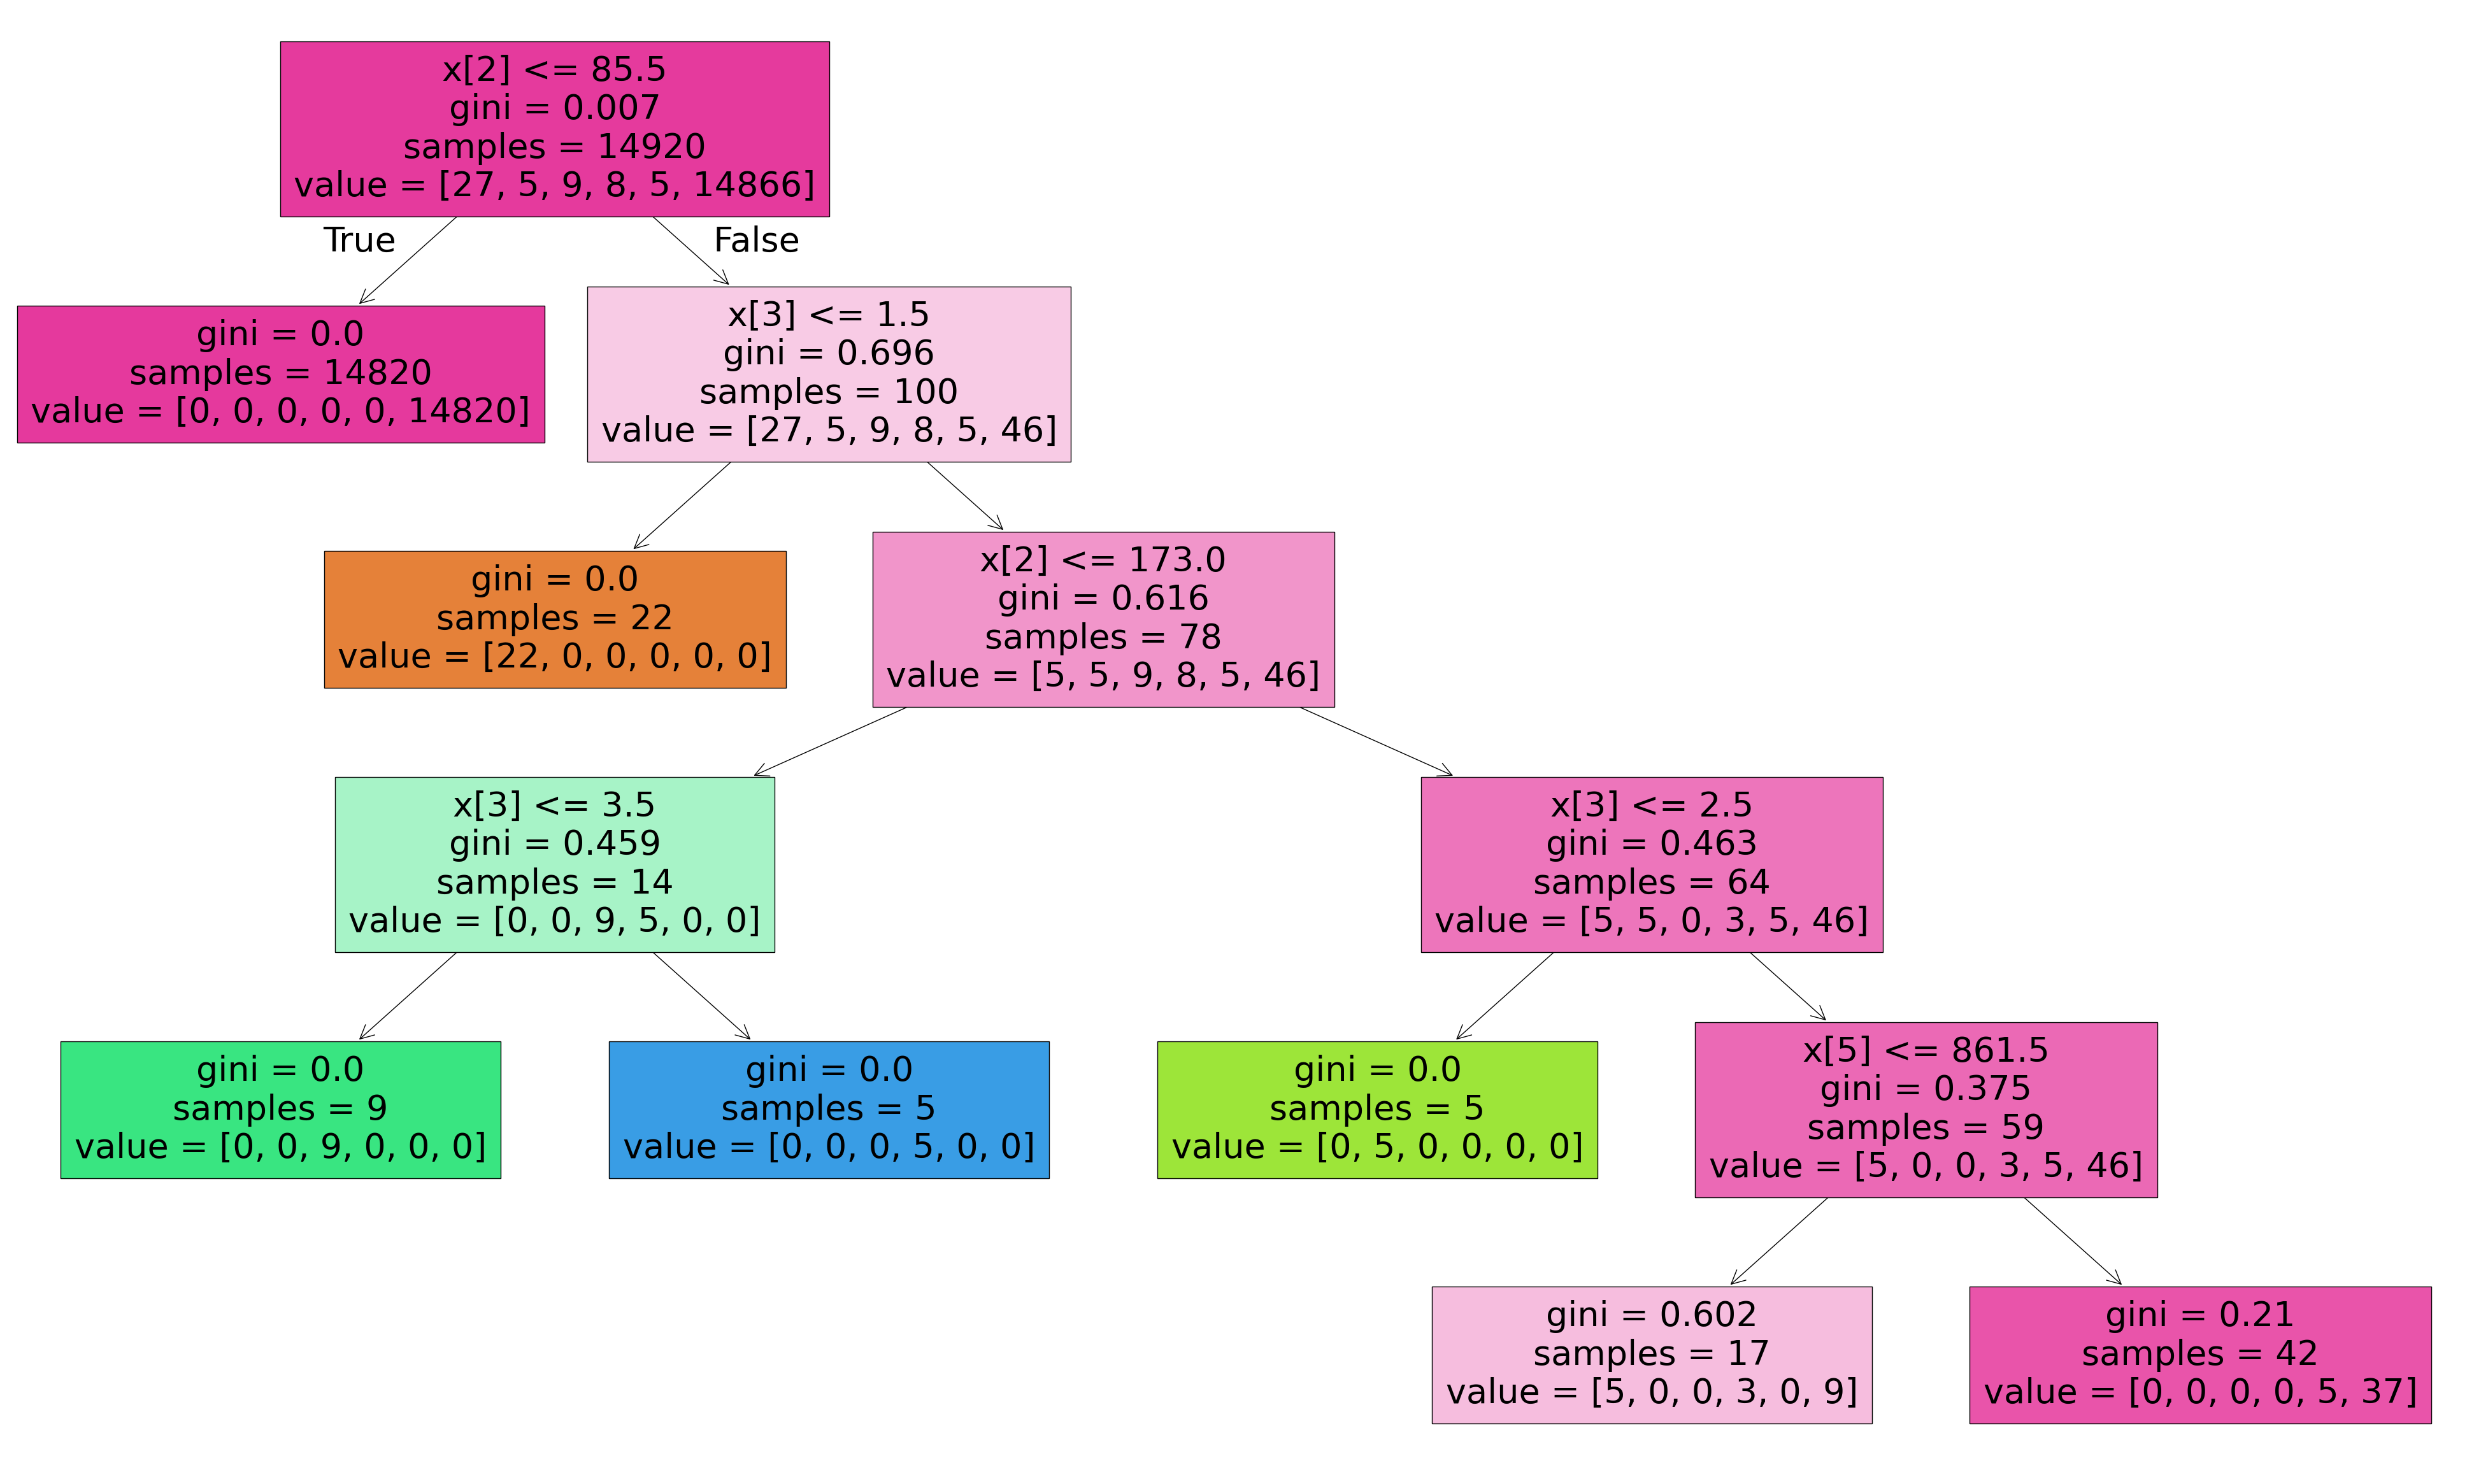

In [79]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(treemodel, filled=True)

In [64]:
# Make predictions on the test set
y_pred =treemodel.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.9994638069705094


In [66]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00      3721

    accuracy                           1.00      3730
   macro avg       0.75      0.75      0.75      3730
weighted avg       1.00      1.00      1.00      3730



c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [67]:
from sklearn.metrics import f1_score

# Calculate the F1 score (macro, weighted, or for a specific class)
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change 'weighted' to 'macro', 'micro', or None
print('F1 Score:', f1)


F1 Score: 0.9991957825247196


In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treemodel, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.99919571 0.99919571 0.99919571 0.99919571 0.99919571]
Mean score: 0.999195710455764
